In [12]:
import os
import glob
import pandas as pd
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

os.chdir("C:/Users/ab/Documents/GitHub/serie_a_analysis/raw_data")

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [13]:
#create a dataframe from the new combined dataset
df = pd.read_csv('19-20.csv')

In [14]:
pd.set_option('display.max_columns', 500)
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.00000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.00000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.621053,1.415789,0.718421,0.610526,11.478947,9.668421,6.186842,5.228947,13.726316,13.821053,5.786842,4.855263,2.436842,2.652632,0.115789,0.142105,2.815579,4.083342,4.331395,2.819763,4.061447,4.304132,2.790105,4.048553,4.193447,2.884526,4.177632,4.542658,2.850184,4.032368,4.494474,2.914184,3.958605,4.632421,3.014921,4.323000,4.833395,2.821000,4.074921,4.338816,1.742816,2.178237,1.775105,2.249474,1.810842,2.284421,1.743974,2.176237,-0.271711,1.964974,1.950053,1.972842,1.949500,2.004079,1.987421,1.944579,1.927289,2.883237,4.15250,4.385053,2.879474,4.116395,4.399132,2.857079,4.063421,4.213053,2.962974,4.207053,4.632553,2.926868,4.086105,4.537105,2.983079,4.078500,4.604316,3.15600,4.402211,4.969447,2.891105,4.128079,4.414184,1.730316,2.226868,1.766789,2.291921,1.815026,2.372447,1.732368,2.220895,-0.260526,1.953026,1.956316,1.960026,1.960737,2.015105,2.020053,1.935789,1.941237
std,1.288708,1.213714,0.860863,0.752056,4.462932,3.903932,3.055224,2.691275,3.854045,3.993343,3.072447,2.917981,1.393051,1.395571,0.359218,0.378604,1.703037,0.974196,3.250402,1.681819,0.947886,3.205583,1.613451,0.899159,3.032242,1.762405,0.997388,3.642531,1.822454,0.932629,3.634657,1.931048,0.991251,3.797708,1.952101,1.092139,4.048464,1.690293,0.949069,3.288605,0.218233,0.386320,0.235284,0.394380,0.235131,0.397533,0.218697,0.361187,0.853571,0.121502,0.096905,0.125420,0.097926,0.128484,0.097797,0.121887,0.092521,1.831618,1.09167,3.441492,1.800788,1.068961,3.468696,1.753964,0.982286,3.125820,1.903871,1.188902,3.865742,1.948116,1.100720,3.746026,2.009762,1.102196,3.681605,2.19436,1.293866,4.292318,1.821499,1.105500,3.467158,0.240461,0.465918,0.256697,0.480292,0.264362,0.490294,0.239597,0.434691,0.885359,0.106084,0.101332,0.102500,0.103493,0.102788,0.111011,0.095772,0.095764
min,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.120000,2.900000,1.300000,1.140000,2.900000,1.300000,1.150000,2.800000,1.310000,1.140000,2.990000,1.310000,1.120000,3.000000,1.270000,1.130000,2.900000,1.250000,1.170000,3.140000,1.330000,1.140000,2.930000,1.300000,1.280000,1.610000,1.280000,1.610000,1.300000,1.670000,1.260000,1.610000,-2.500000,1.700000,1.270000,1.780000,1.330000,1.800000,1.330000,1.760000,1.290000,1.070000,3.00000,1.220000,1.090000,2.950000,1.220000,1.090000,2.850000

#plot some histograms to see some initial findings
plt.hist(df.FTHG)

plt.hist(df.FTAG)

plt.hist(df.HST)

plt.hist(df.AST)

plt.hist(df.HC)

plt.hist(df.AC)

df.describe()

df.head()

In [15]:
df.fillna(0, inplace=True)

In [16]:
#create dummies for half-time and full-time scoreline details
cleanup_TR = {"HTR":    {"H": 3, "D": 1, "A": 0},
              "FTR":    {"H": 3, "D": 1, "A": 0}
              }

In [17]:
#load them back into dataframe
df = df.replace(cleanup_TR)

In [18]:
#convert the Home and Away columns into numbers representing the teams indexes
df["HomeTeam"] = df["HomeTeam"].astype('category')
df["Home_Team_Index"] = df["HomeTeam"].cat.codes
df["AwayTeam"] = df["AwayTeam"].astype('category')
df["Away_Team_Index"] = df["AwayTeam"].cat.codes

In [19]:
#get the key for our Home and Away Indexes 
index = psql.sqldf("SELECT DISTINCT Home_Team_Index, HomeTeam FROM df ORDER BY Home_Team_Index")
print(index)

    Home_Team_Index    HomeTeam
0                 0    Atalanta
1                 1     Bologna
2                 2     Brescia
3                 3    Cagliari
4                 4  Fiorentina
5                 5       Genoa
6                 6       Inter
7                 7    Juventus
8                 8       Lazio
9                 9       Lecce
10               10       Milan
11               11      Napoli
12               12       Parma
13               13        Roma
14               14   Sampdoria
15               15    Sassuolo
16               16        Spal
17               17      Torino
18               18     Udinese
19               19      Verona


In [20]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Home_Team_Index,Away_Team_Index
0,I1,24/08/2019,17:00,Parma,Juventus,0,1,0,0,1,0,5,9,4,4,12,14,5,8,2,3,0,0,9.00,5.25,1.33,9.50,5.00,1.30,9.50,5.20,1.33,10.96,5.28,1.33,11.00,5.25,1.29,12.0,5.25,1.30,12.00,5.50,1.35,10.41,5.13,1.31,1.72,2.10,1.78,2.13,1.79,2.17,1.74,2.09,1.50,1.94,1.99,1.95,1.97,1.95,2.00,1.92,1.96,8.50,5.00,1.33,10.50,5.00,1.33,9.40,5.20,1.33,9.60,5.20,1.37,10.00,5.0,1.32,11.00,5.25,1.33,11.00,5.35,1.39,9.46,5.08,1.34,1.66,2.2,1.71,2.23,1.79,2.39,1.70,2.15,1.50,1.77,2.02,1.81,2.11,1.93,2.12,1.83,2.04,12,7
1,I1,24/08/2019,19:45,Fiorentina,Napoli,3,4,0,1,2,0,10,8,6,6,21,16,4,5,2,4,0,0,4.75,3.75,1.72,4.60,3.60,1.75,4.50,3.80,1.77,5.12,3.71,1.77,4.80,3.60,1.75,5.0,3.70,1.75,5.12,3.85,1.81,4.73,3.67,1.76,1.80,2.00,1.85,2.05,1.85,2.11,1.78,2.04,0.75,1.90,2.03,1.92,2.00,1.92,2.03,1.88,1.99,4.33,3.60,1.83,4.33,3.60,1.85,4.45,3.45,1.87,4.52,3.72,1.85,4.50,3.6,1.78,4.60,3.60,1.87,4.92,3.78,1.95,4.35,3.60,1.85,1.66,2.2,1.72,2.22,1.81,2.25,1.70,2.15,0.75,1.75,2.05,1.81,2.11,1.94,2.14,1.80,2.09,4,11
2,I1,25/08/2019,17:00,Udinese,Milan,1,0,3,0,0,1,11,6,6,0,14,11,9,4,1,3,0,0,3.75,3.30,2.05,3.70,3.20,2.05,3.75,3.35,2.05,3.95,3.40,2.08,3.90,3.25,2.00,4.1,3.25,2.05,4.10,3.43,2.14,3.80,3.31,2.06,2.10,1.72,2.18,1.75,2.18,1.78,2.10,1.73,0.25,2.07,1.72,2.16,1.78,2.17,1.82,2.11,1.77,4.00,3.40,1.95,3.90,3.30,2.05,3.90,3.35,2.00,4.03,3.43,2.04,3.90,3.3,2.00,4.10,3.30,2.05,4.10,3.50,2.10,3.92,3.35,2.03,2.00,1.8,2.11,1.79,2.13,1.84,2.04,1.78,0.50,1.86,2.07,1.88,2.04,1.91,2.09,1.85,2.04,18,10
3,I1,25/08/2019,19:45,Cagliari,Brescia,0,1,0,0,0,1,9,8,5,3,10,11,8,8,2,2,0,0,1.83,3.60,4.33,1.80,3.50,4.40,1.80,3.60,4.55,1.83,3.77,4.57,1.78,3.60,4.50,1.8,3.60,4.75,1.88,3.78,4.75,1.82,3.60,4.45,2.00,1.80,2.00,1.89,2.06,1.89,1.99,1.82,-0.75,2.02,1.77,2.12,1.81,2.14,1.86,2.09,1.80,1.75,3.60,4.75,1.83,3.60,4.40,1.80,3.55,4.60,1.83,3.67,4.75,1.75,3.5,5.00,1.80,3.50,5.20,1.88,3.70,5.20,1.82,3.57,4.63,2.00,1.8,2.04,1.86,2.13,1.90,1.99,1.83,-0.75,2.10,1.83,2.11,1.82,2.12,1.85,2.08,1.82,3,2
4,I1,25/08/2019,19:45,Roma,Genoa,3,3,1,2,2,1,17,6,9,4,15,13,5,1,3,1,0,0,1.45,4.20,8.00,1.44,4.25,7.00,1.50,4.30,6.60,1.50,4.11,8.22,1.47,4.00,7.50,1.5,4.30,7.50,1.53,4.40,8.22,1.49,4.21,7.13,1.72,2.10,1.77,2.14,1.81,2.16,1.75,2.08,-1.00,1.86,2.07,1.86,2.06,1.87,2.13,1.83,2.06,1.70,3.75,5.00,1.65,3.75,5.75,1.60,4.00,5.50,1.75,3.69,5.32,1.75,3.9,4.33,1.73,4.00,5.00,1.77,4.00,6.50,1.70,3.78,5.22,1.61,2.3,1.67,2.31,1.72,2.47,1.66,2.23,-0.75,1.97,1.96,1.98,1.94,1.99,2.20,1.92,1.97,13,5


In [21]:
#remove all betting columns
df = df[['Date', 'HomeTeam', 'Home_Team_Index', 'AwayTeam', 'Away_Team_Index', 'HS', 'AS', 'HST', 'AST', 'HTHG', 'HTAG', 'HTR', 'FTHG', 'FTAG', 'FTR', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]

In [22]:
#rename columns
df.columns = ['Match_Date', 'Home_Team', 'Home_Team_Index', 'Away_Team', 'Away_Team_Index', 'Home_Team_Shots', 'Away_Team_Shots', 'Home_Team_Shots_on_Target', 'Away_Team_Shots_on_Target', 'Half_Time_Home_Team_Goals', 'Half_Time_Away_Team_Goals', 'Half_Time_Result', 'Full_Time_Home_Team_Goals', 'Full_Time_Away_Team_Goals', 'Full_Time_Result', 'Home_Team_Corners', 'Away_Team_Corners', 'Home_Team_Fouls', 'Away_Team_Fouls', 'Home_Team_Yellow_Cards', 'Away_Team_Yellow_Cards', 'Home_Team_Red_Cards', 'Away_Team_Red_Cards']

In [23]:
df.head()
df.isnull().sum()

Match_Date                   0
Home_Team                    0
Home_Team_Index              0
Away_Team                    0
Away_Team_Index              0
Home_Team_Shots              0
Away_Team_Shots              0
Home_Team_Shots_on_Target    0
Away_Team_Shots_on_Target    0
Half_Time_Home_Team_Goals    0
Half_Time_Away_Team_Goals    0
Half_Time_Result             0
Full_Time_Home_Team_Goals    0
Full_Time_Away_Team_Goals    0
Full_Time_Result             0
Home_Team_Corners            0
Away_Team_Corners            0
Home_Team_Fouls              0
Away_Team_Fouls              0
Home_Team_Yellow_Cards       0
Away_Team_Yellow_Cards       0
Home_Team_Red_Cards          0
Away_Team_Red_Cards          0
dtype: int64

(array([137.,   0.,   0.,  85.,   0.,   0.,   0.,   0.,   0., 158.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

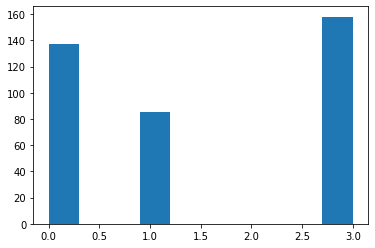

In [24]:
#histogram of the amount of draws vs wins vs losses
plt.hist(df["Full_Time_Result"])

<AxesSubplot:>

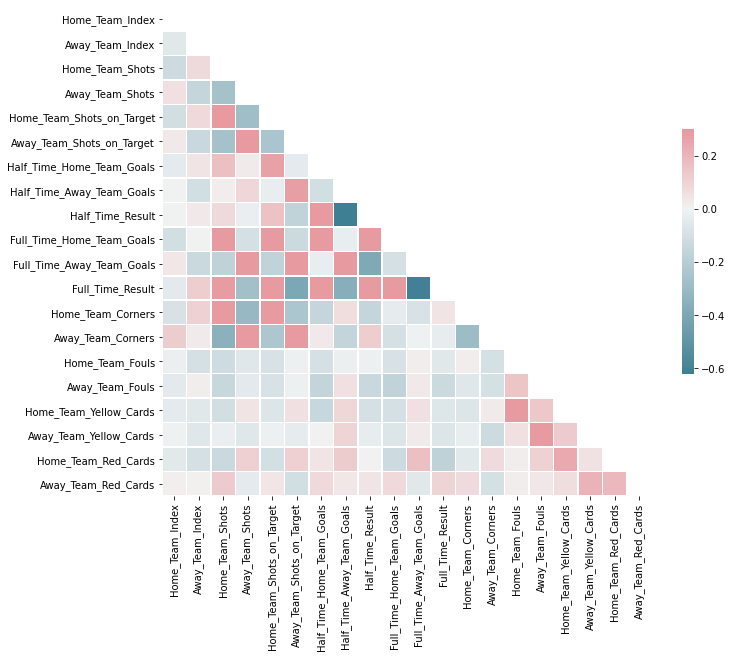

In [25]:
#correlation matrix
corr_matrix = df.corr()

#generate mask for upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

#draw heatmap with mask and correct aspect ratio
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

# MODEL BUILDING

In [26]:
#declare independent and dependent variables, and remove categoric variables
y = df["Full_Time_Result"]
X = df.drop(["Match_Date", "Home_Team", "Away_Team", "Full_Time_Result"], axis=1)

#declare training splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

#standardize the variables using regularization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#data/use softmax regression with ridge regression instead of lasso (because dependent variable has 3 possibilities)
softmax_reg = LogisticRegression(random_state=0, multi_class="multinomial", solver="saga", penalty = 'l2', C = 0.01)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=0.01, multi_class='multinomial', random_state=0,
                   solver='saga')

In [27]:
#create a prediction of y values based on model
y_pred = softmax_reg.predict(X_test)

In [28]:
#find model accuracy from test data
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.7368421052631579


(array([69.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 83.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

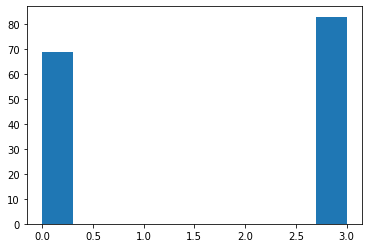

In [29]:
#plot predicted data
plt.hist(y_pred)

In [30]:
#find the worst possible accuracy
baseline_acc = len(y[y == 0]) / len(y) 
print(baseline_acc)

0.3605263157894737


In [31]:
#fidn cohens score; higher score represents less randomness in dataset out of 1
cohens_score = cohen_kappa_score(y_test, y_pred)
print(cohens_score)

0.5781293366638913


In [32]:
print(softmax_reg.coef_)

[[-0.00374918 -0.00686809 -0.07659727  0.05809411 -0.12528326  0.13154004
  -0.05765825  0.08534575 -0.06867167 -0.22215129  0.33751551  0.0288924
  -0.01831039  0.01305456  0.02776528 -0.00654159  0.02135998  0.05237689
  -0.05965864]
 [ 0.02482172 -0.04642809  0.0415755  -0.02113064  0.00226581 -0.05427012
  -0.03496396  0.0011062  -0.08396634 -0.11552528 -0.10784264 -0.04567374
  -0.00071824  0.01202478  0.02591214 -0.04089239  0.01199727  0.02701391
   0.02308677]
 [-0.02107255  0.05329618  0.03502178 -0.03696347  0.12301745 -0.07726992
   0.09262221 -0.08645195  0.152638    0.33767657 -0.22967287  0.01678134
   0.01902862 -0.02507934 -0.05367743  0.04743398 -0.03335726 -0.0793908
   0.03657187]]


([<matplotlib.axis.XTick at 0x16320e88550>,
 [Text(0, 0, 'Home_Team_Index'),
  Text(1, 0, 'Away_Team_Index'),
  Text(2, 0, 'Home_Team_Shots'),
  Text(3, 0, 'Away_Team_Shots'),
  Text(4, 0, 'Home_Team_Shots_on_Target'),
  Text(5, 0, 'Away_Team_Shots_on_Target'),
  Text(6, 0, 'Half_Time_Home_Team_Goals'),
  Text(7, 0, 'Half_Time_Away_Team_Goals'),
  Text(8, 0, 'Half_Time_Result'),
  Text(9, 0, 'Full_Time_Home_Team_Goals'),
  Text(10, 0, 'Full_Time_Away_Team_Goals'),
  Text(11, 0, 'Home_Team_Corners'),
  Text(12, 0, 'Away_Team_Corners'),
  Text(13, 0, 'Home_Team_Fouls'),
  Text(14, 0, 'Away_Team_Fouls'),
  Text(15, 0, 'Home_Team_Yellow_Cards'),
  Text(16, 0, 'Away_Team_Yellow_Cards'),
  Text(17, 0, 'Home_Team_Red_Cards'),
  Text(18, 0, 'Away_Team_Red_Cards')])

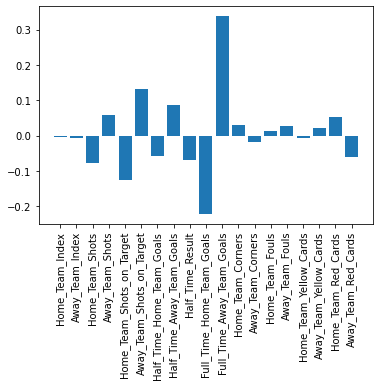

In [33]:
#create a feature importance bar chart using ridge regression
softmax_importance = range(0, softmax_reg.coef_.shape[1])
plt.bar(x = softmax_importance, height = softmax_reg.coef_[0])
plt.xticks(softmax_importance, X.columns, rotation=90)

In [34]:
#use random forest now to do the same thing as logistic regressionl, see if there are any imporvements
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
baseline_acc = len(y[y == 0]) / len(y) 
cohens_score = cohen_kappa_score(y_test, y_pred)
print(acc_score, baseline_acc, cohens_score)

0.7763157894736842 0.3605263157894737 0.6508108108108108


In [35]:
rand_forest.feature_importances_

array([0.03366849, 0.03837705, 0.05083373, 0.04334282, 0.06473369,
       0.04736538, 0.03188581, 0.03149807, 0.06577951, 0.20360615,
       0.20462334, 0.03312282, 0.02745275, 0.02727099, 0.03941233,
       0.02066563, 0.02384521, 0.00695779, 0.00555844])

([<matplotlib.axis.XTick at 0x16320edd9b0>,
 [Text(0, 0, 'Home_Team_Index'),
  Text(1, 0, 'Away_Team_Index'),
  Text(2, 0, 'Home_Team_Shots'),
  Text(3, 0, 'Away_Team_Shots'),
  Text(4, 0, 'Home_Team_Shots_on_Target'),
  Text(5, 0, 'Away_Team_Shots_on_Target'),
  Text(6, 0, 'Half_Time_Home_Team_Goals'),
  Text(7, 0, 'Half_Time_Away_Team_Goals'),
  Text(8, 0, 'Half_Time_Result'),
  Text(9, 0, 'Full_Time_Home_Team_Goals'),
  Text(10, 0, 'Full_Time_Away_Team_Goals'),
  Text(11, 0, 'Home_Team_Corners'),
  Text(12, 0, 'Away_Team_Corners'),
  Text(13, 0, 'Home_Team_Fouls'),
  Text(14, 0, 'Away_Team_Fouls'),
  Text(15, 0, 'Home_Team_Yellow_Cards'),
  Text(16, 0, 'Away_Team_Yellow_Cards'),
  Text(17, 0, 'Home_Team_Red_Cards'),
  Text(18, 0, 'Away_Team_Red_Cards')])

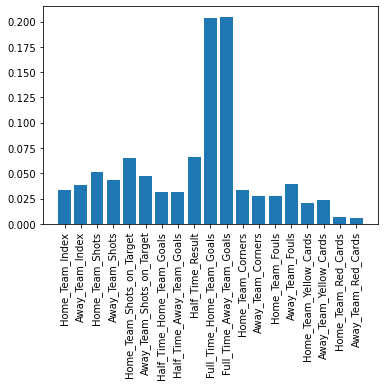

In [36]:
#create a feature importance bar chart
rand_forest_importance = range(0, len(rand_forest.feature_importances_))
plt.bar(x = rand_forest_importance, height = rand_forest.feature_importances_)
plt.xticks(rand_forest_importance, X.columns, rotation=90)

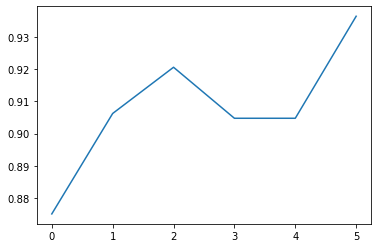

In [37]:
#use K-folds for cross-validation on the random forest model
fold_perf = []

kf = KFold(n_splits=6, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rand_forest = RandomForestClassifier()
    rand_forest.fit(X_train, y_train)
    y_pred = rand_forest.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)
    fold_perf.append(acc_score)

plt.plot(fold_perf)

In [38]:
#create hyperparameters in order to cross-validate the model 
hyperparam_grid = {'n_estimators': [3, 100, 1000],
                   'max_features': [0.05, 0.5, 0.95],
                   'max_depth': [10, 50, 100, None]}

grid_scorer = make_scorer(cohen_kappa_score)
rand_forest = GridSearchCV(RandomForestClassifier(), hyperparam_grid, cv=kf, scoring=grid_scorer)
rand_forest.fit(X, y)

GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50, 100, None],
                         'max_features': [0.05, 0.5, 0.95],
                         'n_estimators': [3, 100, 1000]},
             scoring=make_scorer(cohen_kappa_score))

In [39]:
print(rand_forest.best_score_)
print(rand_forest.best_params_)

0.9878087539779102
{'max_depth': None, 'max_features': 0.95, 'n_estimators': 1000}


In [40]:
np.set_printoptions(threshold=np.inf)
model_predictions = rand_forest.predict(X_test)
i = 1
predicted = model_predictions.tolist()
actual = y_test.tolist()
print(predicted)
print(actual)

[0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 1, 1, 3, 1, 1, 3, 3, 0, 1, 0, 1, 3, 3, 1, 1, 0, 0, 3, 3, 3, 3, 0, 0, 3, 1, 3, 0, 0, 0, 0, 1, 0, 3, 3, 0, 1, 0, 3, 1, 0, 1, 0, 3, 0, 1, 3, 3, 1, 3, 0, 0, 3]
[0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 1, 1, 3, 1, 1, 3, 3, 0, 1, 0, 1, 3, 3, 1, 1, 0, 0, 3, 3, 3, 3, 0, 0, 3, 1, 3, 0, 0, 0, 0, 1, 0, 3, 3, 0, 1, 0, 3, 1, 0, 1, 0, 3, 0, 1, 3, 3, 1, 3, 0, 0, 3]


In [41]:
print(len(actual))
print(len(predicted))
print(len(y_test))
print(len(X_test))

63
63
63
63


predicted_df.drop('points')

In [42]:
### DO NOT RE-RUN ###

predicted_df = X_test
predicted_df['Points'] = predicted
predicted_df.head()

ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Home_Team_Index,Away_Team_Index,Home_Team_Shots,Away_Team_Shots,Home_Team_Shots_on_Target,Away_Team_Shots_on_Target,Half_Time_Home_Team_Goals,Half_Time_Away_Team_Goals,Half_Time_Result,Full_Time_Home_Team_Goals,Full_Time_Away_Team_Goals,Home_Team_Corners,Away_Team_Corners,Home_Team_Fouls,Away_Team_Fouls,Home_Team_Yellow_Cards,Away_Team_Yellow_Cards,Home_Team_Red_Cards,Away_Team_Red_Cards,Points
6,16,0,8,18,3,14,2,1,3,2,3,2,10,13,16,2,1,0,0,0
11,10,2,11,4,6,2,1,0,3,1,0,5,3,14,18,3,4,0,0,3
12,7,11,10,12,8,7,2,0,3,4,3,2,5,13,13,3,3,0,0,3
14,0,17,19,8,12,6,1,1,1,2,3,12,5,13,15,2,2,0,0,0
16,5,4,18,15,10,7,1,0,3,2,1,9,8,17,15,2,0,0,0,3


In [43]:
print(type(index))
print(index.columns)
print(type(cleaned_prediction))
print(cleaned_prediction.describe())

<class 'pandas.core.frame.DataFrame'>
Index(['Home_Team_Index', 'HomeTeam'], dtype='object')


NameError: name 'cleaned_prediction' is not defined

In [115]:
cleaned_prediction = psql.sqldf("SELECT Home_Team_Index, SUM(Points) as Standing FROM predicted_df GROUP BY Home_Team_Index ORDER BY Standing DESC")
print(cleaned_prediction.describe())

       Home_Team_Index  Standing
count        36.000000  36.00000
mean         17.500000  29.00000
std          10.535654  28.20233
min           0.000000   0.00000
25%           8.750000   6.50000
50%          17.500000  18.00000
75%          26.250000  49.00000
max          35.000000  92.00000


In [124]:
bindi = pd.DataFrame(index)
final_prediction = psql.sqldf("SELECT b.HomeTeam, Standing FROM cleaned_prediction c LEFT OUTER JOIN bindi b ON c.Home_Team_Index = b.Home_Team_Index ORDER BY Standing DESC")
print(final_prediction)

      HomeTeam  Standing
0     Juventus        92
1         Roma        91
2       Napoli        83
3        Inter        77
4        Milan        73
5    Sampdoria        58
6        Lazio        58
7        Genoa        49
8   Fiorentina        49
9     Atalanta        49
10    Cagliari        44
11       Parma        36
12     Udinese        35
13     Bologna        34
14      Torino        27
15     Palermo        26
16    Sassuolo        21
17      Chievo        21
18      Empoli        15
19     Catania        15
20      Verona        13
21     Pescara        13
22       Lecce        13
23       Carpi        12
24       Siena        10
25     Brescia        10
26        Spal         7
27      Novara         5
28   Frosinone         3
29      Cesena         2
30     Livorno         1
31   Benevento         1
32        Bari         1
33      Spezia         0
34     Crotone         0
35           0         0
